In [ ]:
from langdetect import detect
import pandas as pd
import requests
import csv
import re

r = requests.get('https://www.jobfeed.nl/api/v3/search?_fields=posting_id,job_title,full_text&date__range=now-1M__now&_limit=10000&job_title=junior|medior|senior',
                 auth=('Anonymous', 'Anonymous'))

results = pd.DataFrame(r.json()['results'])

def determine_seniority(title):
    seniority = ''
    if re.search(r'\b(senior|sr)\b', title, re.IGNORECASE):
        seniority = 'Senior'
    elif re.search(r'\b(medior)\b', title, re.IGNORECASE):
        seniority = 'Medior'
    elif re.search(r'\b(junior|jr)\b', title, re.IGNORECASE):
        seniority = 'Junior'
    return seniority

results['seniority_level'] = results['job_title'].apply(determine_seniority)

results['lang'] = results['full_text'].apply(detect)
results = results[results['lang'] == 'nl']

results[['posting_id', 'job_title', 'full_text', 'seniority_level']] \
    .to_csv('data/seniority-nl-2.csv', index=False, header=True, quoting=csv.QUOTE_ALL)

In [ ]:
# import numpy as np
# import csv
# np.random.shuffle(df.values)
# df = df.drop_duplicates(subset=['posting_id'])
# df.to_csv('data/seniority-nl.csv', index=False, header=True, quoting=csv.QUOTE_ALL)

In [1]:
import pandas as pd

df = pd.read_csv('data/seniority-nl.csv.gz', index_col=None)

In [2]:
df.head(n=25)

,posting_id,job_title,full_text,seniority_level
0,97ff16bb8d274b69885b362e31389ead,Medior Uitvoerder,Medior Uitvoerder\n\n Vacature omschrijving...,Medior
1,8662f46cd11b46c18a11339073a197dd,Senior Beheerder,"Senior Beheerder\n\n Wijnandsrade, Nederlan...",Senior
2,0935d36526814b98b485a2d36338ef66,Medior Fullstack Programmeur regio,Alles weergevennum of num\n\n Medior Fullst...,Medior
3,b15b2e26c3ae4e64a6244d67550bc4ad,Machinist Junior,De zon komt op in de havens van Dordrecht. J...,Junior
4,da02c88bc50746b7a255d36f45e21301,Junior Assistent Accountant HBO (SPOED),* Zoekresultaat\n * Vacature\n\n Junior As...,Junior
5,d57492fa368c403e85669b0b49929237,Senior Storingsmonteur,Vacature Senior Storingsmonteur\n\n Heemske...,Senior
6,150eabc5caae42d3ac063d2f38a26675,Junior assistent accountant (MBO),Junior assistent accountant (MBO)\n\n Werkg...,Junior
7,736d11b0119340fe8464cf749722341d,Medior fiscalist,Medior fiscalist\n\n Werkgever: Rousch Fina...,Medior
8,553937e36653443f816c0674b64007d7,Senior Software Engineer .Net,Senior Software Engineer .Net\n\n Informati...,Senior
9,e5cb6455230743bf8dc4f50cc4d576ad,Junior Consultant Retirement,"* Finance & banking\n * Amstelveen\n * 40,...",Junior


In [3]:
df.shape

(37769, 4)

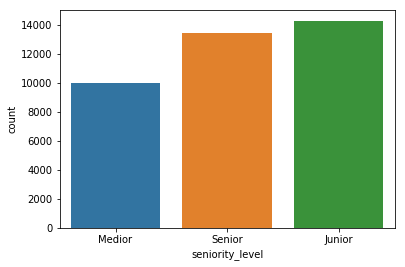

In [4]:
%matplotlib inline

import seaborn as sns

sns.countplot(x=df['seniority_level'])

In [5]:
from gensim.parsing.preprocessing import preprocess_string, RE_TAGS, strip_punctuation, stem_text, \
    strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short, strip_non_alphanum
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, MaxAbsScaler
from sklearn.decomposition import TruncatedSVD
from unicodedata import normalize

SENIORITIES = {'junior', 'medior', 'senior', 'jr', 'sr'} 

def remove_seniority(s):
    return " ".join(w for w in s.split() if w not in SENIORITIES)

my_filters = [
    lambda x: x.lower(), strip_punctuation, strip_non_alphanum,
    strip_multiple_whitespaces, remove_stopwords, remove_seniority
]

def my_tokenizer(s):
    return preprocess_string(s, filters=my_filters)
    
vect = CountVectorizer(min_df=900, max_df=0.2, analyzer='word', tokenizer=my_tokenizer, ngram_range=(1, 3),
                       stop_words=SENIORITIES)

#df['full_text_clean'] = df['full_text'].apply(lambda s: ' '.join(preprocess_string(s, filters=my_filters)))

X = vect.fit_transform(df['full_text'])

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(df['seniority_level'])

In [7]:
X.shape

(37769, 3355)

In [8]:
y.shape

(37769,)

In [14]:
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import Normalizer

classifiers = [
    MultinomialNB(),
    
    LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000, multi_class='multinomial'),
    LogisticRegression(solver='lbfgs', C=0.05, max_iter=1000, multi_class='multinomial'),
    LogisticRegression(solver='lbfgs', C=0.01, max_iter=1000, multi_class='multinomial'),
        
#     make_pipeline(
#         SelectKBest(f_classif, 1000),
#         MultinomialNB()
#     ),
    
#     make_pipeline(
#         SelectKBest(f_classif, 1000),
#         LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
#     ),
    
#     make_pipeline(
#         TruncatedSVD(n_components=2000),
#         LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
#     ),
    
    #make_pipeline(
    #    SelectKBest(f_classif, 1000),
    #    Normalizer(),
    #    MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000)
    #)
]

for clf in classifiers:
    scores = cross_validate(clf, X, y, cv=StratifiedKFold(n_splits=3, shuffle=True),
                            scoring=['accuracy', 'f1_macro', 'neg_log_loss'], n_jobs=4)
    
    print("{:>24} Took: {:.2f}s Accuracy: {:.2f} (+/- {:.2f}) F1: {:.2f} (+/- {:.2f}) Log loss: {:.2f} (+/- {:.2f})" \
          .format(clf.__class__.__name__, scores['fit_time'].mean(),
                  scores['test_accuracy'].mean(), scores['test_accuracy'].std(),
                  scores['test_f1_macro'].mean(), scores['test_f1_macro'].std(),
                  scores['test_neg_log_loss'].mean(), scores['test_neg_log_loss'].std()))

           MultinomialNB Took: 0.12s Accuracy: 0.62 (+/- 0.00) F1: 0.61 (+/- 0.00) Log loss: -7.76 (+/- 0.12)
      LogisticRegression Took: 182.06s Accuracy: 0.72 (+/- 0.00) F1: 0.71 (+/- 0.00) Log loss: -0.81 (+/- 0.01)
      LogisticRegression Took: 56.26s Accuracy: 0.73 (+/- 0.00) F1: 0.72 (+/- 0.00) Log loss: -0.68 (+/- 0.00)
      LogisticRegression Took: 28.67s Accuracy: 0.73 (+/- 0.00) F1: 0.72 (+/- 0.00) Log loss: -0.64 (+/- 0.00)


In [24]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

gsc = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial'),
    param_grid={
        'C': [0.01, 0.05, 0.1]
    },
    cv=ShuffleSplit(n_splits=3, test_size=0.5),
    n_jobs=4,
    verbose=3
)

grid_result = gsc.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:  1.6min remaining:   47.5s
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  2.1min finished


Best: 0.730792 using {'C': 0.01}


In [ ]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y)

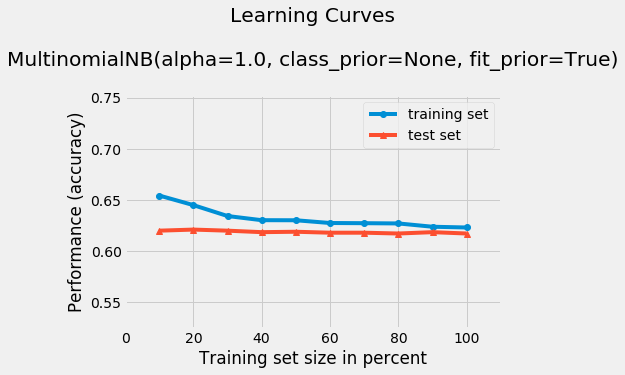

In [16]:
%matplotlib inline

from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

_ = plot_learning_curves(Xtr, ytr, Xte, yte, clf, scoring='accuracy')

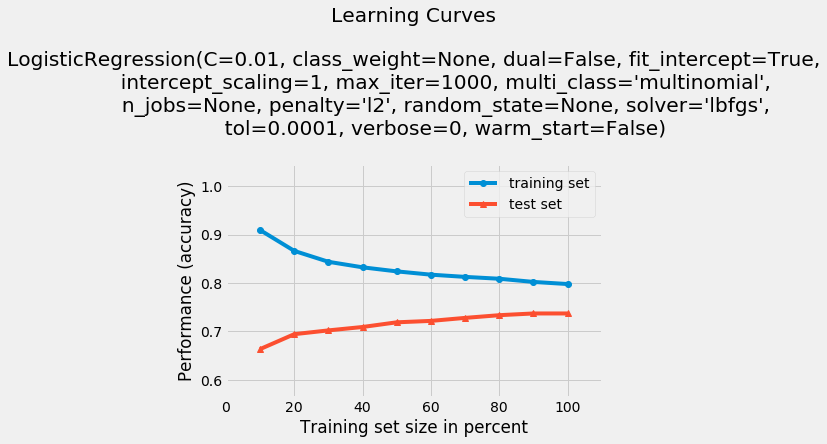

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs', C=0.01, max_iter=1000, multi_class='multinomial')
_ = plot_learning_curves(Xtr, ytr, Xte, yte, clf, scoring='accuracy')

In [ ]:
# from sklearn.svm import SVC, LinearSVC

# clf = LinearSVC(max_iter=5000)
# _ = plot_learning_curves(Xtr, ytr, Xte, yte, clf)

In [18]:
#clf = MultinomialNB()
clf = LogisticRegression(solver='lbfgs', C=0.01, max_iter=1000, multi_class='multinomial')
clf.fit(Xtr, ytr)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
from sklearn.metrics import classification_report

ypred = clf.predict(Xte)

print(classification_report(yte, ypred, target_names=le.classes_))

              precision    recall  f1-score   support

      Junior       0.80      0.85      0.82      2858
      Medior       0.68      0.62      0.65      2002
      Senior       0.72      0.71      0.71      2694

   micro avg       0.74      0.74      0.74      7554
   macro avg       0.73      0.73      0.73      7554
weighted avg       0.74      0.74      0.74      7554



In [20]:
le.classes_

array(['Junior', 'Medior', 'Senior'], dtype=object)

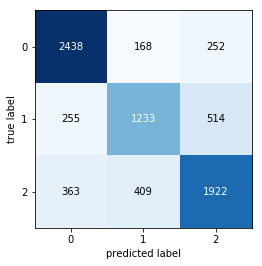

In [21]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(confusion_matrix(yte, ypred))

In [22]:
import numpy as np

feature_names = vect.get_feature_names()

for i, class_label in enumerate(le.classes_):
    top10 = np.argsort(clf.coef_[i])[-20:]
    print("%s: %s" % (class_label, ", ".join(feature_names[j] for j in top10)))
    print()

Junior: bouwkunde, opgeleid, begeleiding van, begin, leert, minimaal 1, bedrijfskunde, 2 500, en 2, samen met een, maximaal, leergierig, leren, starters, 2500, enige, 1 jaar, 2 jaar, stage, starter

Medior: fiscaal, vacatures voor, een rijbewijs, minimaal 2, 3 jaar, 5 jaar, primaire, wat bieden, minimaal 3 jaar, gedrag, informatica, nieuwe uitdaging, minimaal 3, bedrijfsnaam, een mbo, geboden, geboden wordt, tot 5, 3 5, 2018

Senior: uren 32, ervaren, jouw ervaring, minimaal 3, ruime, ervaring als, strategische, een ervaren, vijf, lead, strategisch, coachen, jaar ervaring met, minimaal 3 jaar, ruime ervaring, 4 jaar, minimaal 5 jaar, 5 jaar, minimaal 5, 10 jaar



In [29]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 400000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 160

tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'…')
tokenizer.fit_on_texts(df['full_text_clean'])

print('Found %s unique tokens.' % len(tokenizer.word_index))

Found 140514 unique tokens.


In [30]:
sequences = tokenizer.texts_to_sequences(df['full_text_clean'])
sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [27]:
tokenizer.__dict__.keys()

dict_keys(['word_counts', 'word_docs', 'filters', 'split', 'lower', 'num_words', 'document_count', 'char_level', 'oov_token', 'index_docs', 'word_index', 'index_word'])

In [33]:
# from keras.preprocessing.sequence import pad_sequences
# from bpemb import BPEmb

# NB_TOKENS = 100000
# MAX_SEQUENCE_LENGTH = 250
# EMBEDDING_DIM = 200

# bpemb_nl = BPEmb(lang="nl", vs=NB_TOKENS, dim=EMBEDDING_DIM)

# sequences = [ bpemb_nl.encode_ids(sentence) for sentence in df['full_text'] ]
# sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

Using TensorFlow backend.


In [19]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['seniority_level'])

y_keras = to_categorical(y)

In [8]:
#df[['job_title', 'full_text']].head(n=26).tail(n=1)

In [9]:
#bpemb_nl.encode(df.loc[25, 'full_text'])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(sequences, y_keras, test_size=0.15, shuffle=True)

In [11]:
from gensim.models import KeyedVectors

#vectors = KeyedVectors.load_word2vec_format('/home/dehling/Downloads/glove.6B.100d.txt', binary=False)

# Dutch word2vec embeddings, (pre-)trained on wikipedia
vectors = KeyedVectors.load_word2vec_format('/home/dehling/Downloads/160/wikipedia-160.txt', binary=False)

In [32]:
import numpy as np

#missing = set()
#found = 0
#not_found = 0

#embedding_matrix = np.random.normal(0.0, 1.0, (len(tokenizer.word_index) + 1, EMBEDDING_DIM))
embedding_matrix = np.random.normal(0.0, 0.2, (len(tokenizer.word_index) + 1, EMBEDDING_DIM))

for word, i in tokenizer.word_index.items():
    if word in vectors:
        embedding_matrix[i] = vectors.get_vector(word)
        #found += 1
    #else:
        #missing.add(word)
        #not_found += 1

In [33]:
from keras.models import Sequential
from keras.layers import Input, Embedding, Dropout, Dense, GRU, BatchNormalization, Bidirectional

model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1,   # NB_TOKENS
                    EMBEDDING_DIM,
                    weights=[embedding_matrix],      # [bpemb_nl.emb.vectors]
                    input_length=MAX_SEQUENCE_LENGTH,
                    trainable=False))
model.add(Dropout(rate=0.25))
model.add(GRU(40))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 160)          22482400  
_________________________________________________________________
dropout_3 (Dropout)          (None, 250, 160)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 40)                24120     
_________________________________________________________________
batch_normalization_2 (Batch (None, 40)                160       
_________________________________________________________________
dropout_4 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 123       
Total params: 22,506,803
Trainable params: 24,323
Non-trainable params: 22,482,480
___________________________________________________________

In [35]:
hist = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=12, batch_size=128, verbose=True)

Train on 31371 samples, validate on 5537 samples
Epoch 1/12
31371/31371 [==============================] - 31s 984us/step - loss: 1.0707 - acc: 0.4347 - val_loss: 1.0019 - val_acc: 0.4750
Epoch 2/12
31371/31371 [==============================] - 30s 960us/step - loss: 1.0054 - acc: 0.4742 - val_loss: 0.9945 - val_acc: 0.4891
Epoch 3/12
31371/31371 [==============================] - 30s 958us/step - loss: 0.9797 - acc: 0.4954 - val_loss: 1.1271 - val_acc: 0.4697
Epoch 4/12
31371/31371 [==============================] - 30s 962us/step - loss: 0.9566 - acc: 0.5180 - val_loss: 0.9139 - val_acc: 0.5528
Epoch 5/12
31371/31371 [==============================] - 30s 962us/step - loss: 0.9068 - acc: 0.5574 - val_loss: 0.8711 - val_acc: 0.5871
Epoch 6/12
31371/31371 [==============================] - 30s 963us/step - loss: 0.8772 - acc: 0.5844 - val_loss: 0.8447 - val_acc: 0.6030
Epoch 7/12
31371/31371 [==============================] - 31s 984us/step - loss: 0.8581 - acc: 0.5956 - val_loss: 0.8

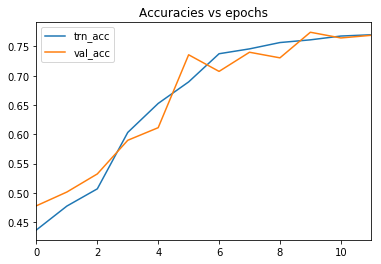

In [17]:
%matplotlib inline

df_hist = pd.DataFrame({
    'trn_acc': hist.history['acc'],
    'val_acc': hist.history['val_acc']
})

df_hist.plot(title='Accuracies vs epochs')

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_val.argmax(axis=1), model.predict(X_val).argmax(axis=1), target_names=le.classes_))

              precision    recall  f1-score   support

      Junior       0.91      0.75      0.82      2176
      Medior       0.69      0.76      0.72      1349
      Senior       0.71      0.79      0.75      2012

   micro avg       0.77      0.77      0.77      5537
   macro avg       0.77      0.77      0.77      5537
weighted avg       0.78      0.77      0.77      5537



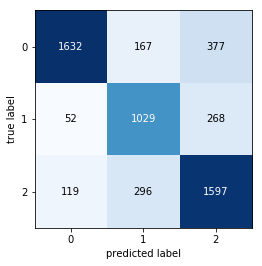

In [21]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

_ = plot_confusion_matrix(confusion_matrix(y_val.argmax(axis=1), model.predict(X_val).argmax(axis=1)))